# Practice 9

## Question 1

Follow the steps below to create a 3 x 5 numpy array representing the following data:
$$\begin{matrix}
0 & 1 & 2 & 3 & 4 \\
0 & 1.5 & 3 & 4.5 & 6\\
0 & 0.25 & 0.5 & 0.75 & 1
\end{matrix}$$

1. Use `np.linspace` or `np.arange` to create three 1 x 5 arrays `[0 1 2 3 4]`, `[0. 1.5 3. 4.5 6.]` and `[0 0.25 0.5 0.75 1.]`.
1. Use `np.zeros` to create an 5 x 3 array of zeros.
1. Use slicing to assign each 1 x 5 array to each row of the array.


In [25]:
import numpy as np


row1 = np.linspace(0, 4, num=5)
row2 = np.linspace(0, 6, num=5)
row3 = np.linspace(0, 1, num=5)

q1 = np.zeros((3, 5))

q1[0,:] = row1
q1[1,:] = row2
q1[2,:] = row3

print(a)


[[0.   1.   2.   3.   4.  ]
 [0.   1.5  3.   4.5  6.  ]
 [0.   0.25 0.5  0.75 1.  ]]


## Question 2

Use `np.sum` to create:
1. A 1 x 3 array containing the sum of the rows
1. A 1 x 5 array containing the sum of the columns

of the array created in Question 1.

In [26]:
sum_of_rows = np.sum(q1, axis=0)
sum_of_columns = np.sum(q1, axis=1)

print(sum_of_rows)
print(sum_of_columns)

[ 0.    2.75  5.5   8.25 11.  ]
[10.  15.   2.5]


## Question 3
Write a function `threshold(a, x)` which thresholds the array `a` at the value `x`. The array returned be the function should be the same shape as `a`, and `True` where `a` greater or equal to x, otherwise `False`.
If `q1` is the array from Question 1:
```
z = threshold(q1, 1.5)
print(z)
[[False False  True  True  True]
 [False  True  True  True  True]
 [False False False False False]]
```

In [28]:
def threshold(a, x):
    b = (a >= x)
    return b

print(threshold(q1, 1.5))

[[False False  True  True  True]
 [False  True  True  True  True]
 [False False False False False]]


## Question 4

The image file `sixbysix.png` consists of a large but faint blob in the top left, and a number of small number of bright pixels elsewhere. Follow the particle tracking method in the notes to find and mark the large blob, as below.

1. Read the image into an array and reduce to greyscale
1. Threshold the array at a suitable value
1. Find all blobs in the image
1. Identify the largest blob
1. Determine the co-ordinates of the largest blob and 

<img src="sixbysix_marked.png" />

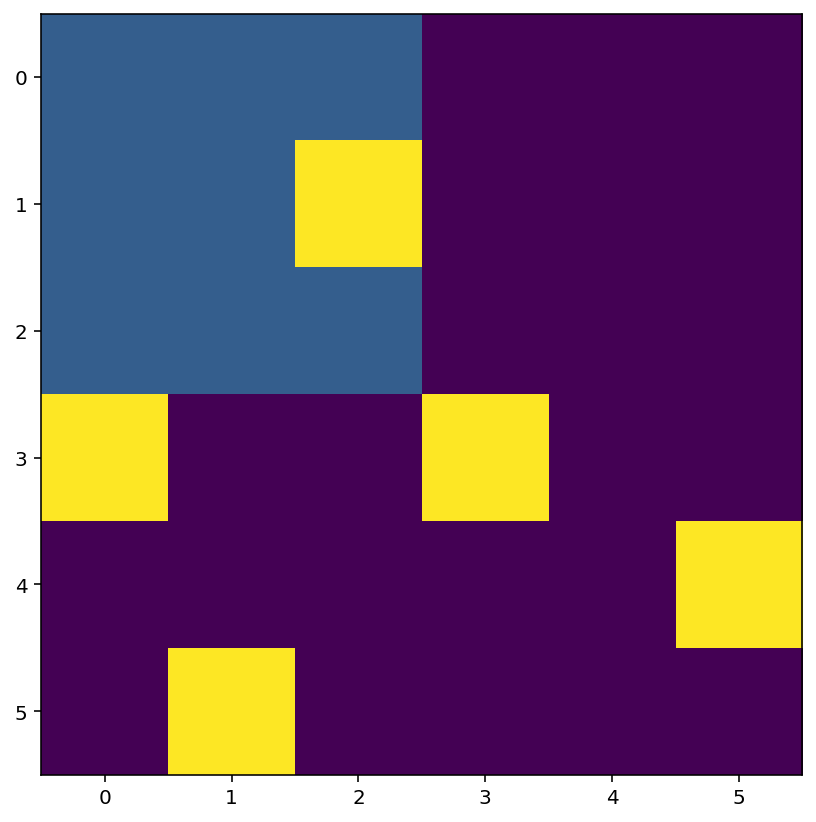

In [80]:
import numpy as np
import matplotlib.pyplot as plt

z = np.zeros((6,6))
z[0:3,0:3] = .3


for i in range(5):

    x = np.random.randint(6)
    y = np.random.randint(6)
    z[x,y] = 1


plt.imshow(z)

import matplotlib.image as mpimg # import the image module

mpimg.imsave("sixbysix.png", z, vmax = 2, cmap="gray")



Min: 1.0
Max: 2.5058825
[[ True  True  True False False False]
 [ True  True  True False False False]
 [ True  True  True False False False]
 [ True False False  True False False]
 [False False False False False  True]
 [False  True False False False False]]
number of blobs: 4
[[1 1 1 0 0 0]
 [1 1 1 0 0 0]
 [1 1 1 0 0 0]
 [1 0 0 2 0 0]
 [0 0 0 0 0 3]
 [0 4 0 0 0 0]]
sizes: [10.  1.  1.  1.]
index: 0
location: (1.2, 0.9)
index: 0


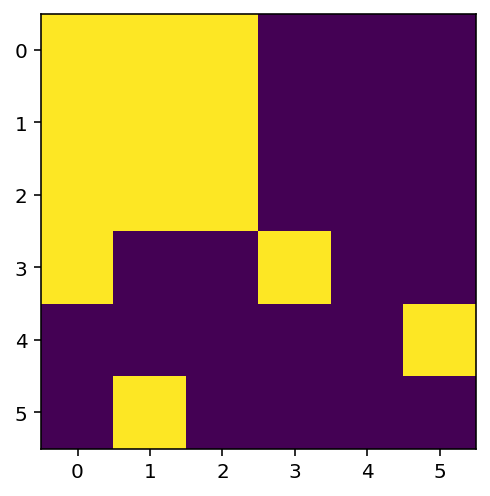

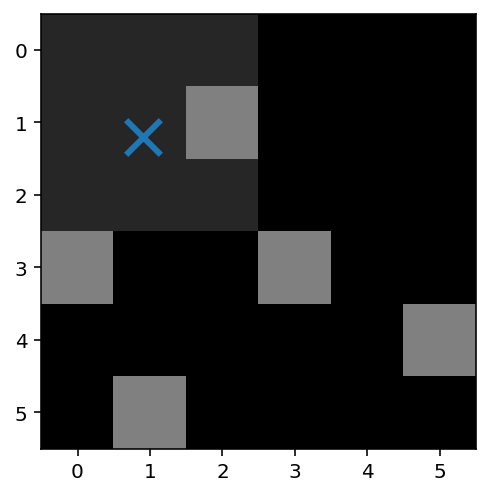

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # import the image module
import scipy.ndimage as sn # import the scipy.ndimage package

x = mpimg.imread("sixbysix.png") # read the image into an array
z = np.sum(x, 2) # sum the RGBA values for each pixel

print("Min:", np.min(z))
print("Max:", np.max(z))

thres = 1.4
x_thres = z > thres # Determine pixels which are above the threshold
print(x_thres)
plt.figure(figsize=(4,4))
plt.imshow(x_thres) # Note that in Python True = 1 and False = 0

x_labels, n = sn.label(x_thres) # generate 
print("number of blobs:", n)
print(x_labels)

sizes = sn.sum(x_thres, x_labels, range(1, n+1))
print("sizes:", sizes)

idx = np.argmax(sizes) # get the index of the largest blob
print("index:", idx)

location = sn.center_of_mass(x_thres, x_labels, idx + 1) # determine the coordinates of the largest blob
print("location:", location)

idx = np.argmax(sizes) # get the index of the largest blob
print("index:", idx)

plt.figure(figsize=(4,4))
plt.imshow(x)
# arrays are indexed [column, row] whereas scatter plots are ordered [x, y]
# so we need to reverse the order of the indices
plt.scatter(location[1], location[0], marker="x", s=300, lw=3)

plt.savefig("sixbysix_marked.png")


